In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
training_set = pd.read_csv("../input/planets-dataset/planet/planet/train_classes.csv")

In [3]:
training_set.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
training_imgs = ["{}.jpg".format(x) for x in list(training_set.image_name)]

In [5]:
training_imgs[:10]

['train_0.jpg',
 'train_1.jpg',
 'train_2.jpg',
 'train_3.jpg',
 'train_4.jpg',
 'train_5.jpg',
 'train_6.jpg',
 'train_7.jpg',
 'train_8.jpg',
 'train_9.jpg']

In [6]:
# Build list with unique labels
label_list = []
for tag_str in training_set.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [7]:
label_list

['haze',
 'primary',
 'agriculture',
 'clear',
 'water',
 'habitation',
 'road',
 'cultivation',
 'slash_burn',
 'cloudy',
 'partly_cloudy',
 'conventional_mine',
 'bare_ground',
 'artisinal_mine',
 'blooming',
 'selective_logging',
 'blow_down']

In [8]:
for label in label_list:
    training_set[label] = training_set['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
training_set.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [9]:
training_set['image_name']= training_imgs
training_set.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0.jpg,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1.jpg,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_dataGen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  validation_split = 0.2,
                                  horizontal_flip = True)

In [12]:
X_train = train_dataGen.flow_from_dataframe(
                                        dataframe = training_set,
                                        directory="../input/planets-dataset/planet/planet/train-jpg/",x_col="image_name",
                                        y_col= label_list,
                                        class_mode='raw',
                                        target_size=(128,128),
                                        subset = 'training',
                                        shuffle=True,
                                        batch_size=32)
X_test = train_dataGen.flow_from_dataframe(
                                        dataframe = training_set,
                                        directory="../input/planets-dataset/planet/planet/train-jpg/",x_col="image_name",
                                        y_col= label_list,
                                        class_mode='raw',
                                        target_size=(128,128),
                                        subset = 'validation',
                                        shuffle=True,
                                        batch_size=32)

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [13]:
sample_submission = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')
test_df1 = sample_submission.copy()
test_df1['image_name'] = test_df1['image_name'].apply(lambda x: '{}.jpg'.format(x))
test_df1.head()

,image_name,tags
0,test_0.jpg,primary clear agriculture road water
1,test_1.jpg,primary clear agriculture road water
2,test_2.jpg,primary clear agriculture road water
3,test_3.jpg,primary clear agriculture road water
4,test_4.jpg,primary clear agriculture road water


In [15]:
test_df1 = test_df1.iloc[:40669]['image_name'].reset_index().drop('index', axis =1)
test_df1.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


In [16]:
#initialize imagedatagenerator for the test images and also rescaling
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  validation_split = 0.2,
                                  horizontal_flip = True)

#creating a generator for the images found in the first test image files
y_train = test_datagen.flow_from_dataframe(dataframe=test_df1, 
                                            directory='/kaggle/input/planets-dataset/planet/planet/test-jpg/', 
                                            x_col="image_name", 
                                            y_col=None, 
                                            batch_size=32,
                                            seed=42,
                                            shuffle=False, 
                                            class_mode=None, 
                                            subset = 'training',
                                            target_size=(128,128))
y_test = test_datagen.flow_from_dataframe(dataframe=test_df1, 
                                            directory='/kaggle/input/planets-dataset/planet/planet/test-jpg/', 
                                            x_col="image_name", 
                                            y_col=None, 
                                            batch_size=32,
                                            seed=42,
                                            shuffle=False, 
                                            class_mode=None, 
                                            subset = 'validation',
                                            target_size=(128,128))


Found 32536 validated image filenames.
Found 8133 validated image filenames.


In [17]:
import keras
from keras import backend as K

The F2 score is F(beta) score with beta = 2. So beta_squared = 4

The formula of F(beta) is given by:

(1 + beta_squared) * (precision * recall)/ ((beta_squared * precision) + recall)

In [18]:
# Function to calculate F-Beta score
def fbeta_score_K(y_true, y_pred):
    beta_squared = 4

    tp = K.sum(y_true * y_pred) + K.epsilon()
    fp = K.sum(y_pred) - tp
    fn = K.sum(y_true) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    result = (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())
    return result

In [22]:
model1 = Sequential()
model1.add(Conv2D(128, 5, 2, activation = "relu", input_shape = (128,128, 3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(128, 5, 2, activation = "relu"))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(512, activation = "relu"))
model1.add(Dense(17, activation = "sigmoid"))

In [23]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=[fbeta_score_K])

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

In [28]:
model1_fit =model1.fit(X_train, validation_data = X_test, epochs = 15, batch_size = 32)

Epoch 1/15
1012/1012 [==============================] - 451s 446ms/step - loss: 0.1942 - fbeta_score_K: 0.6584 - val_loss: 0.1837 - val_fbeta_score_K: 0.6629
Epoch 2/15
1012/1012 [==============================] - 394s 389ms/step - loss: 0.1786 - fbeta_score_K: 0.6863 - val_loss: 0.1780 - val_fbeta_score_K: 0.7092
Epoch 3/15
1012/1012 [==============================] - 406s 401ms/step - loss: 0.1677 - fbeta_score_K: 0.7059 - val_loss: 0.1615 - val_fbeta_score_K: 0.7003
Epoch 4/15
1012/1012 [==============================] - 398s 393ms/step - loss: 0.1607 - fbeta_score_K: 0.7187 - val_loss: 0.1591 - val_fbeta_score_K: 0.7338
Epoch 5/15
1012/1012 [==============================] - 398s 393ms/step - loss: 0.1550 - fbeta_score_K: 0.7297 - val_loss: 0.1521 - val_fbeta_score_K: 0.7353
Epoch 6/15
1012/1012 [==============================] - 391s 386ms/step - loss: 0.1512 - fbeta_score_K: 0.7366 - val_loss: 0.1466 - val_fbeta_score_K: 0.7395
Epoch 7/15
1012/1012 [==============================

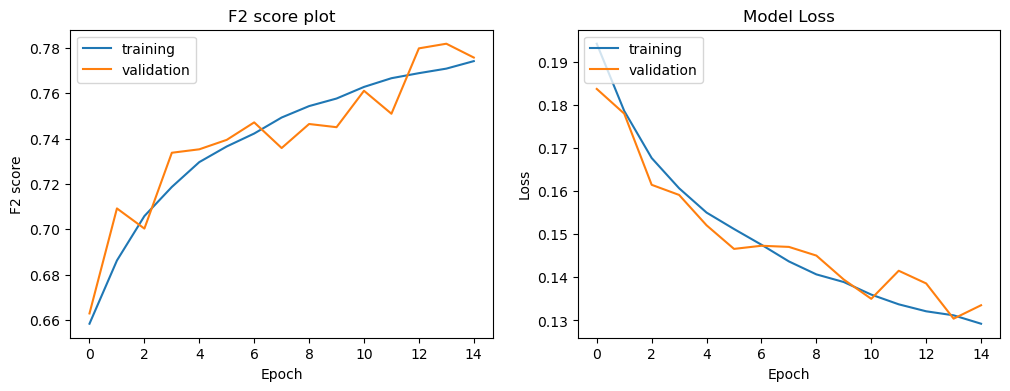

In [30]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model1_fit.history['fbeta_score_K'])
plt.plot(model1_fit.history['val_fbeta_score_K'])
plt.title('F2 score plot')
plt.ylabel('F2 score')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model1_fit.history['loss'])
plt.plot(model1_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.show()

In [31]:
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_gen = test_datagen.flow_from_dataframe(dataframe=test_df1, 
                                            directory='/kaggle/input/planets-dataset/planet/planet/test-jpg/', 
                                            x_col="image_name", 
                                            y_col=None, 
                                            batch_size=32,
                                            seed=42,
                                            shuffle=False, 
                                            class_mode=None, 
                                            target_size=(128,128))

step_test_size1 = int(np.ceil(test_gen.samples/test_gen.batch_size))

Found 40669 validated image filenames.


In [32]:
# Reset the test generator to avoid shuffling of index 
test_gen.reset()
pred = model1.predict(test_gen, steps=step_test_size1, verbose=1)

1271/1271 [==============================] - 501s 394ms/step


In [33]:
# Get the filenames in test_gen using the attribute .filenames
file_names = test_gen.filenames

# labels should be included only if the probability of occurrance of the label is greater than 0.5 
pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(label_list)[x > 0.5]), axis = 1)
result1 = pd.DataFrame({'image_name': file_names, 'tags': pred_tags})
result1.head()

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary clear
4,test_4.jpg,cloudy


In [38]:
#Additional test dataset
test2_df = sample_submission.copy()
test2_df = test2_df.iloc[40669:]['image_name'].reset_index().drop('index', axis =1)
test2_df.head()

,image_name
0,file_0
1,file_1
2,file_10
3,file_100
4,file_1000


In [39]:
test2_df['image_name'] = test2_df['image_name'].apply(lambda x: '{}.jpg'.format(x))
test2_df.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [40]:
test_gen1 = test_datagen.flow_from_dataframe(dataframe=test2_df, 
                                                directory='../input/planets-dataset/test-jpg-additional/test-jpg-additional', 
                                                x_col='image_name', 
                                                y_col=None, 
                                                batch_size=32, 
                                                shuffle=False, 
                                                class_mode=None, 
                                                target_size=(128,128))

step_test_size2 = int(np.ceil(test_gen1.samples/test_gen1.batch_size))

Found 20522 validated image filenames.


In [41]:
test_gen1.reset()
pred1 = model1.predict(test_gen1, steps = step_test_size2, verbose = 1)

642/642 [==============================] - 254s 396ms/step


In [43]:
# Get the filenames in test_gen1 using the attribute .filenames
file_names1 = test_gen1.filenames

# labels should be included only if the probability of occurrance of the label is greater than 0.5 
pred_tags1 = pd.DataFrame(pred1)
pred_tags1 = pred_tags1.apply(lambda x: ' '.join(np.array(label_list)[x>0.5]), axis = 1)
result2 = pd.DataFrame({'image_name': file_names1, 'tags': pred_tags1})
result2.head()

,image_name,tags
0,file_0.jpg,primary clear
1,file_1.jpg,primary agriculture clear habitation road
2,file_10.jpg,haze primary
3,file_100.jpg,primary clear
4,file_1000.jpg,primary clear


In [44]:
# Final result = result1 + result2 (concatenated)
final_df = pd.concat([result1, result2])

final_df = final_df.reset_index().drop('index', axis =1)

print(final_df.shape)
final_df.head()

(61191, 2)


,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary clear
4,test_4.jpg,cloudy


In [45]:
# Remove the .jpg extension from the image_name
final_df['image_name'] = final_df['image_name'].apply(lambda x: x[:-4])
final_df.head()

,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,primary partly_cloudy
3,test_3,primary clear
4,test_4,cloudy


In [46]:
# Save results to a csv file
final_df.to_csv('submission.csv', index = False)